###  Import py file

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent / "src"))


### Perform Initial EDA

In [2]:
# Import necessary libraries
import pandas as pd
import runpy
import complaint_analysis

In [3]:
# Step 1: Download NLTK resources
complaint_analysis.download_nltk_resources()

NLTK resources downloaded/checked.


In [4]:
# Step 2: Initialize NLTK components
stop_words, lemmatizer = complaint_analysis.initialize_nltk_components()

In [5]:

# Step 3: Load the dataset
file_path = '/home/samrawit/creditrust-RAG/data/complaints.csv'
df = complaint_analysis.load_dataset(file_path)

Attempting to load data from: /home/samrawit/creditrust-RAG/data/complaints.csv


/home/samrawit/creditrust-RAG/src/complaint_analysis.py:44: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')


Dataset loaded successfully with UTF-8 encoding.


In [6]:
# Step 4: Check for missing values
missing_values = complaint_analysis.check_missing_values(df)
print(missing_values)


--- Missing Values Count ---
                              Missing Count  Missing %
Tags                                8981029  93.457011
Consumer disputed?                  8841498  92.005044
Consumer complaint narrative        6629041  68.982113
Company public response             4770207  49.638999
Consumer consent provided?          1649561  17.165409
Sub-issue                            839522   8.736105
Sub-product                          235295   2.448491
State                                 54516   0.567296
ZIP code                              30228   0.314554
Company response to consumer             20   0.000208
Issue                                     6   0.000062


In [7]:
df.shape

(9609797, 18)


--- Distribution of Complaints by Product ---


/home/samrawit/creditrust-RAG/src/complaint_analysis.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


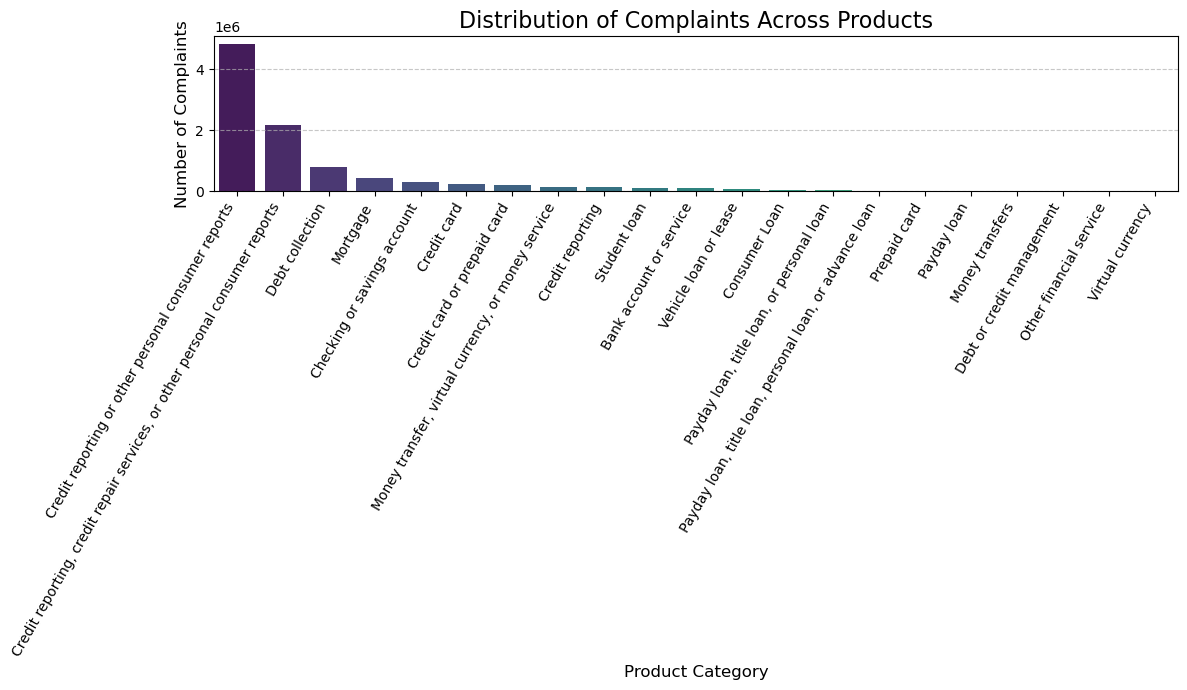

In [9]:
# Step 5: Analyze product distribution
complaint_analysis.analyze_product_distribution(df)

In [10]:
# Step 6: Filter data
products_to_keep = ['Credit card', 'Personal loan', 'Payday loan', 'Savings account', 'Money transfers']
df_filtered = complaint_analysis.filter_data(df, products_to_keep)

Filtered by products. New shape: (83910, 18)



Descriptive statistics for narrative length (word count):
count    83910.000000
mean       198.842176
std        220.921230
min          2.000000
25%         63.000000
50%        140.000000
75%        258.000000
max       6469.000000
Name: narrative_length, dtype: float64


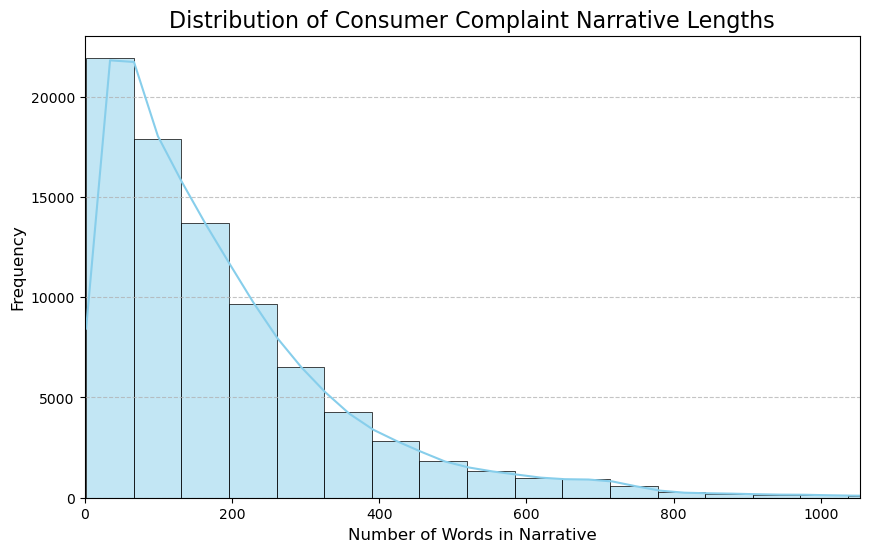

In [11]:
# Step 7: Analyze narrative length
complaint_analysis.analyze_narrative_length(df_filtered)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from complaint_analysis import download_nltk_resources, initialize_nltk_components

# 🟢 This will download wordnet, stopwords, and punkt if not available
download_nltk_resources()

# Now initialize components
stop_words, lemmatizer = initialize_nltk_components()


NLTK resources downloaded/checked.


In [13]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/samrawit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [15]:
import nltk
print(nltk.data.path)


['/home/samrawit/nltk_data', '/home/samrawit/anaconda3/nltk_data', '/home/samrawit/anaconda3/share/nltk_data', '/home/samrawit/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [16]:
import os
print(os.path.exists('/home/samrawit/nltk_data/corpora/stopwords'))
print(os.path.exists('/home/samrawit/nltk_data/corpora/wordnet'))
print(os.path.exists('/home/samrawit/nltk_data/corpora/omw-1.4'))


True
False
False


In [17]:
import nltk
nltk.download('punkt_tab')  
nltk.download('punkt')      


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk

nltk.download('wordnet', download_dir='/home/samrawit/nltk_data')
nltk.download('omw-1.4', download_dir='/home/samrawit/nltk_data')


[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/samrawit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
nltk.data.path.append('/home/samrawit/nltk_data')


In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("running"))  

running


In [23]:
# Step 8: Apply text cleaning
from complaint_analysis import apply_text_cleaning



In [24]:
complaint_analysis.apply_text_cleaning(df_filtered, stop_words, lemmatizer)


Text cleaning applied to 'Consumer complaint narrative' column.


In [25]:
# Step 9: Save the cleaned data
output_file_path = '../data/filtered_and_cleaned_complaints.csv'
complaint_analysis.save_cleaned_data(df_filtered, output_file_path)



Cleaned and filtered data saved successfully to: ../data/filtered_and_cleaned_complaints.csv
Shape of the saved data: (83910, 20)
First 5 rows of the saved data (final output):
      Date received      Product                                 Sub-product  \
12237    2025-06-13  Credit card                           Store credit card   
13280    2025-06-12  Credit card  General-purpose credit card or charge card   
13506    2025-06-12  Credit card  General-purpose credit card or charge card   
13955    2025-06-09  Credit card  General-purpose credit card or charge card   
14249    2025-06-09  Credit card  General-purpose credit card or charge card   

                                                 Issue  \
12237                            Getting a credit card   
13280               Other features, terms, or problems   
13506             Incorrect information on your report   
13955  Problem with a purchase shown on your statement   
14249                     Problem when making payme

In [26]:

# Step 10: Clean up
complaint_analysis.clean_up(df_filtered)

In-memory DataFrames deleted.
